<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Enrique Rodriguez Torres.
<br>
<i><b>Asignatura:</b></i> Aprendizaje de Máquinas
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Segundo Parcial.
<br>
<br>
</FONT>
</div>

In [49]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

<div>
<b></b>
<br>
<i><b>Punto 1:</b></i> Usando las 30 primeras muestras del dataset de diabetes,  y las columnas
Pregnancies,Glucose de entrada y Outcome de salida
<br>
<b></b>
<br>
<i><b>LINK DE DATOS:</b></i> https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Realizar validación cruzada con k =3
<br>
<b></b>
<br>
<i><b>A:</b></i>Crear un modelo de regresión logística con sklearn
Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar accuracy en train y test
<br>
<b></b>
<br>
<i><b>B:</b></i>Crear un modelo de árbol de decisión con max_depth=3 con sklearn
Para cada cv dibujar frontera(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar accuracy en train y test
<br>
<b></b>
<br>
<i><b>C:</b></i>Crear un modelo de KNN(escalar los datos antes) con sklearn
determinar accuracy en train y test
<br>
<b></b>
<br>
<div>

In [51]:
df_biabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df_biabetes_30 = df_biabetes.head(30)

In [52]:
X = df_biabetes_30[['Pregnancies', 'Glucose']].values
Y = df_biabetes_30['Outcome'].values

In [53]:
results = cross_validate(DecisionTreeClassifier(),
                         X, Y, scoring="accuracy",
                         cv= 3, return_estimator=True, return_train_score=True)
results

{'fit_time': array([0.00849319, 0.00063324, 0.00038671]),
 'score_time': array([0.000772  , 0.00025392, 0.00021195]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.7, 0.6, 0.5]),
 'train_score': array([1., 1., 1.])}

In [54]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y)

LogisticRegression()

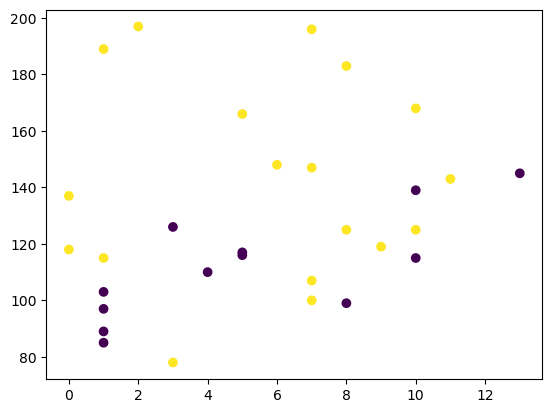

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [56]:

# Supongamos que tienes X y Y

# Definir el número de pliegues (k)
k = 3
kf = KFold(n_splits=k)

# Crear un modelo de regresión logística
logisticRegr = LogisticRegression()

# Inicializar listas para almacenar las métricas de entrenamiento y prueba de todos los folds
train_accs = []
test_accs = []
coef = []
intercept = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    logisticRegr.fit(X_train, y_train)

    coef.append(logisticRegr.coef_)
    intercept.append(logisticRegr.intercept_)

    train_predictions = logisticRegr.predict(X_train)
    test_predictions = logisticRegr.predict(X_test)

    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Fold {fold + 1} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

# Imprimir el promedio de las métricas de todos los folds
print(f"Promedio Train Accuracy: {sum(train_accs) / k:.2f}")
print(f"Promedio Test Accuracy: {sum(test_accs) / k:.2f}")
print(f"Coeficientes: {coef}")
print(f"Intercepto: {intercept}")


Fold 1 - Train Accuracy: 0.65, Test Accuracy: 0.90
Fold 2 - Train Accuracy: 0.80, Test Accuracy: 0.50
Fold 3 - Train Accuracy: 0.65, Test Accuracy: 0.60
Promedio Train Accuracy: 0.70
Promedio Test Accuracy: 0.67
Coeficientes: [array([[-0.03108979,  0.0406608 ]]), array([[-0.02292539,  0.05056949]]), array([[-0.11700025,  0.04443722]])]
Intercepto: [array([-4.57294494]), array([-5.98880146]), array([-4.2428066])]


In [57]:
#w1,w2 primer arreglo de  datos 
w1_1 = coef[0][0][0]
w2_1 = coef[0][0][1]
#w1,w2 segundo  arreglo de  datos 
w1_1 = coef[1][0][0]
w2_2 = coef[1][0][1]

#w1,w2 tercer  arreglo de  datos 
w1_3 = coef[2][0][0]
w2_3 = coef[2][0][1]

#intercepto 1
b_1 = intercept[0][0]
b_2 = intercept[1][0]
b_3 = intercept[2][0]



In [58]:
print(w1_1,w1_1,w1_1,w2_2,w1_3,w2_3)
print(b_1,b_2,b_3)

-0.022925391634170896 -0.022925391634170896 -0.022925391634170896 0.05056949249175513 -0.11700024977429585 0.04443722364664929
-4.572944941421326 -5.988801461183304 -4.242806597240042


In [59]:
def f_x_values(w1,w2,x1_values,b):
    x_values=(-((w1/w2) * x1_values + ((b)/w2)))
    return x_values

[112.46567673 112.52262828 112.57957984 112.63653139 112.69348295
 112.75043451 112.80738606 112.86433762 112.92128918 112.97824073
 113.03519229 113.09214385 113.1490954  113.20604696 113.26299851
 113.31995007 113.37690163 113.43385318 113.49080474 113.5477563
 113.60470785 113.66165941 113.71861097 113.77556252 113.83251408
 113.88946564 113.94641719 114.00336875 114.0603203  114.11727186
 114.17422342 114.23117497 114.28812653 114.34507809 114.40202964
 114.4589812  114.51593276 114.57288431 114.62983587 114.68678742
 114.74373898 114.80069054 114.85764209 114.91459365 114.97154521
 115.02849676 115.08544832 115.14239988 115.19935143 115.25630299
 115.31325455 115.3702061  115.42715766 115.48410921 115.54106077
 115.59801233 115.65496388 115.71191544 115.768867   115.82581855
 115.88277011 115.93972167 115.99667322 116.05362478 116.11057633
 116.16752789 116.22447945 116.281431   116.33838256 116.39533412
 116.45228567 116.50923723 116.56618879 116.62314034 116.6800919
 116.7370434

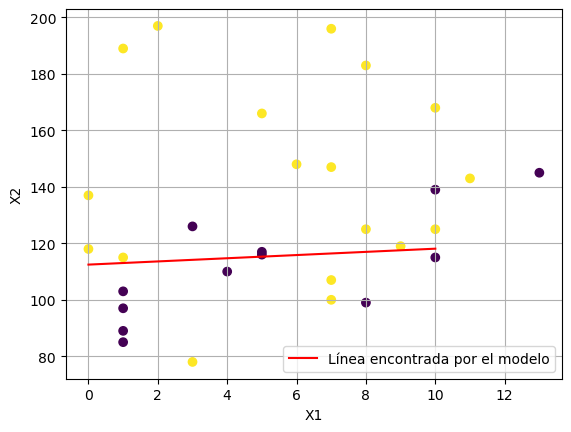

In [60]:


# Crear una gráfica para mostrar los datos de muestra y la línea
plt.scatter(X[:, 0], X[:, 1], c=Y)
x1_values = np.linspace(0, 10, 100)  # Valores de x1 para la línea
x2_values = -((w1_1/w2_1) * x1_values + ((b_1)/w2_1)) # Calcular x2 utilizando la ecuación de la línea
#x2_values =  f_x_values(w1_1,w2_2,x1_values,b_1) # Calcular x2 utilizando la ecuación de la línea

print(x2_values)
plt.plot(x1_values, x2_values, 'r-', label="Línea encontrada por el modelo")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

(0.0, 6.0)

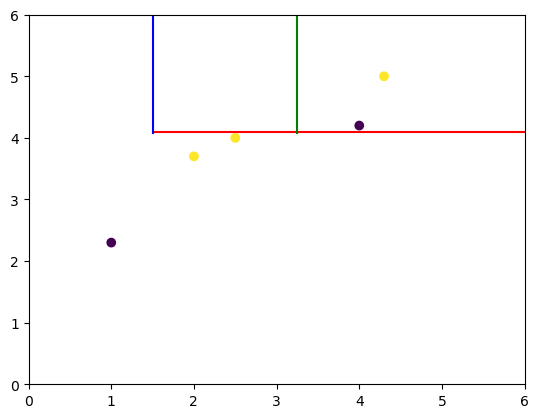

In [61]:
df = pd.DataFrame({"x1":[1, 2, 2.5, 4, 4.3], "x2":[2.3, 3.7, 4.0, 4.2, 5], "y":[0, 1, 1, 0, 1]})
plt.scatter(df["x1"],df["x2"],c=df["y"])
plt.axhline(4.1, xmin=0.25, color="r")
# plt.axhline(4.1, ymin=0.75, color="r")
plt.axvline(1.5, ymin=0.68, color="b")
plt.axvline(3.25, ymin=0.68,color="g")
plt.xlim(0, 6)
plt.ylim(0, 6)

<div>
<b></b>
<br>
<i><b>Punto 2:</b></i>  Usando el dataset de california housing, las 30 primeras muestras del dataset de housing,  y las columnas:
housing_median_age y median_incom entrada y house_median_value de salida
<br>
<b></b>
<br>
<i><b>LINK DE DATOS:</b></i>https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv
<br>
<b></b>
<br>
<i><b>A:</b></i>Crear un modelo de regresión lineal con sklearn
Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar rmse en train y test
<br>
<b></b>
<br>
<i><b>B:</b></i>Crear un modelo de árbol de decisión con sklearn max_depth=3
Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
determinar rmse en train y test
<br>
<b></b>
<br>
<i><b>C:</b></i>Crear un modelo de KNN con sklearn(escalar los datos antes)
<br>
determinar rmse en train y test


Analizar los resultados.


